# Pair Programming Asunciones Regresión Lineal

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene


plt.rcParams["figure.figsize"] = (10,8) 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df= pd.read_csv('../files/life_data_limp.csv', index_col=0)
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:


## 1. Normalidad (ya la deberíais haber evaluado)

`Test de Shapiro`

In [8]:
stats.shapiro(df['life_expectancy'])

ShapiroResult(statistic=nan, pvalue=1.0)

Nuestra variables de respuesta es normal.

`Análisis gráfico`

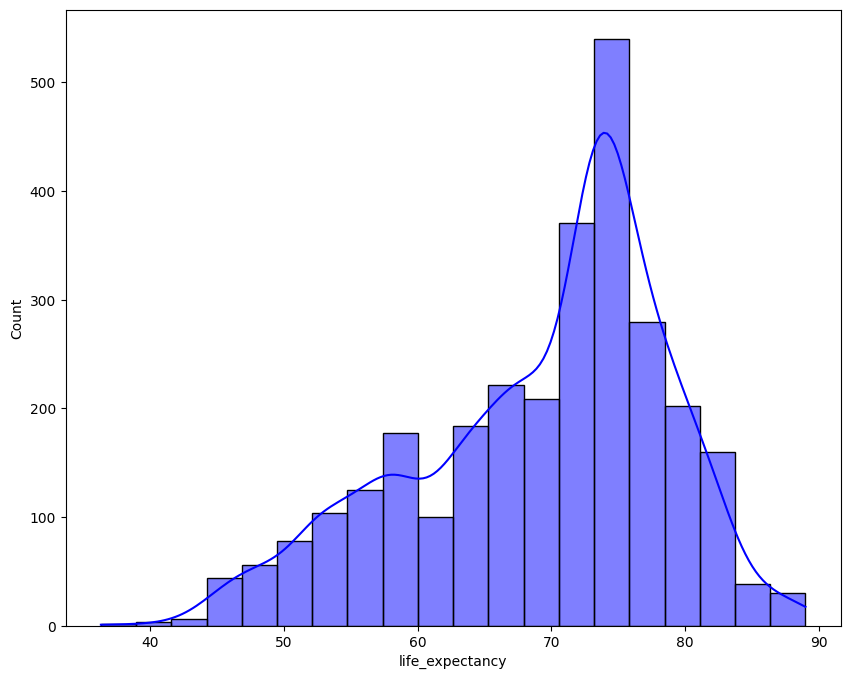

In [9]:
# primero lo hacemos visualmente

sns.histplot(df['life_expectancy'],  bins=20, kde = True, 
        color = "blue",);

## 2. Homogeneidad de varianzas

In [10]:
len(df["country"].value_counts())

193

In [11]:
df["country"].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: country, Length: 193, dtype: int64

``Análisis gráfico``

In [12]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

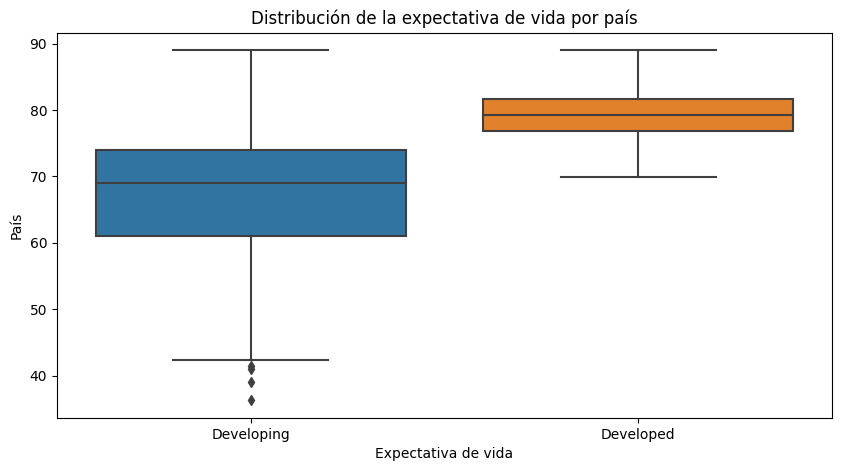

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.boxplot(
    x       = 'status',
    y       = 'life_expectancy',
    data    = df,
    palette = "tab10",
    ax      = ax
)
ax.set_title("Distribución de la expectativa de vida por país")
ax.set_ylabel("País")
ax.set_xlabel("Expectativa de vida");

Primero debemos crearnos un *dataframe* diferente para cada una de las categorías de la variable. Ese *dataframe* deberá tener solo una columna, en realidad será una Serie. Esa columna contendrá los valores de la variable predictora, en nuestro caso los precios de las casas. Al final tendremos tantos *dataframes* como categorías tenga la columna `CHAS`. 

- Usar los métodos de la lirería `scipy.stats` para evaluar si nuestros datos presentan homocedasticidad o no.

In [ ]:
# extraemos los distintos dataframes que necesitaremos

cerca = df[df["CHAS"] == 'Si']["MEDV"]
lejos = df[df["CHAS"] == 'No']["MEDV"]

In [ ]:
# Levene test
# ==============================================================================
levene_test = stats.levene(cerca, lejos, center='median')
levene_test

In [ ]:
# Bartlett test
# ==============================================================================
bartlett_test = stats.bartlett(cerca, lejos)
bartlett_test

## Independencia de las variables

La prueba de independencia comprueba la dependencia entre variables y es una prueba general. 

In [ ]:
# en este ejemplo evaluaremos la independencia entre dos de nuestras columnas: 

crosstab, test_results, expected = rp.crosstab(df["INDUS"], df["CHAS"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [ ]:
test_results

En nuestro caso, el p-valor es menor que 0.05, por lo tanto, nuestras variables son dependientes entre ellas. En otras palabras,el hecho de estar cerca del rio (en función de la concentración de oxidos nitritos) probablemente no muestre una diferencia en el valor de las viviendas. 